<a href="https://colab.research.google.com/github/iamleevn/pedestrian-detection/blob/master/super_detectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION
This notebook implements pedetrian detection in low light condition. We use low-light images enhancement (LLE) methods as preprocess step for detection. LLE method used is **ZeroDCE**. Detectors used are **Pedestron** (2020) , **YOLOv4** (pretrained COCO) and **YOLOv4** (trained on KAIST).

# HOW TO USE
1. Change Runtime type to GPU. Click Runtime --> Change runtime type --> GPU.
2. Run all cells. Click Runtime --> Run all or Ctrl + F9. This step is setup enviroments and dependencies. After about 15 minutes, you will see the demo results below.
3. If you want test on your own images, go to "Run on your images" sections and follow the steps in that.


# Detection

In [ ]:
!pip install -q gwpy

     |████████████████████████████████| 1.4MB 3.3MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 2.6MB 18.3MB/s 


In [ ]:
%%capture
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
#check CUDA version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# Change CUDA version
!mv "../usr/local/cuda" "../usr/local/cudahigher"
!mv "../usr/local/cuda-10.0" "../usr/local/cuda"

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [ ]:
# Install other required dependencies
%%capture
%%shell

conda install -y pytorch==1.2.0 torchvision==0.4.0 cudatoolkit=10.0 -c pytorch
conda install -y cython
conda install -c pytorch -y nccl2
pip install mmcv==0.2.14 #not in conda
conda install -y ipykernel

In [ ]:
%%shell
# git clone https://github.com/hasanirtiza/Pedestron.git
git clone https://github.com/iamleevn/pedestrian-detection

Cloning into 'pedestrian-detection'...
remote: Enumerating objects: 456, done.
remote: Counting objects: 100% (456/456), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 456 (delta 106), reused 417 (delta 80), pack-reused 0
Receiving objects: 100% (456/456), 7.84 MiB | 25.40 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [ ]:
# setup mmdetection and other dependencies
%%capture
%%shell

cd /content/pedestrian-detection/Pedestron
# conda run python setup.py develop
pip install -v -e .

In [ ]:
%%capture
# download model
!pip install gdown

# Pedestron
!gdown https://drive.google.com/uc?id=1MqI1-Bbn0vl5Ft1RnhD70YWl7JHRyVMx -O CascadeRCNNCP_model.pth.stu
!mkdir /content/pedestrian-detection/Pedestron/models_pretrained/ && cp CascadeRCNNCP_model.pth.stu /content/pedestrian-detection/Pedestron/models_pretrained/

# YOLOv4 pretrained COCO
!gdown https://drive.google.com/uc?id=1wv_LiFeCRYwtpkqREPeI13-gPELBDwuJ -O /content/pedestrian-detection/pytorch-YOLOv4/weights/

# YOLOv4 custom KAIST
!gdown https://drive.google.com/a/gm.uit.edu.vn/uc?id=1-082uknrKaHemlvWwZp_mB7iOryqch9B -O /content/pedestrian-detection/pytorch-YOLOv4/weights/yolov4.weights

In [ ]:
%%capture
# create result folder
!mkdir /content/pedestrian-detection/result_images

# Pedestron's detection
%cd /content/pedestrian-detection/Pedestron
!python tools/demo.py configs/elephant/crowdhuman/cascade_hrnet.py ./models_pretrained/CascadeRCNNCP_model.pth.stu /content/pedestrian-detection/demo_images /content/pedestrian-detection/result_images

# YOLOv4 pretrained COCO's detection
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python models.py weights/yolov4.pth /content/pedestrian-detection/demo_images /content/pedestrian-detection/result_images

# YOLOv4 customed KAIST's detection
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python demo.py

In [ ]:
# show results
def show_result(path):
    import os
    import glob
    import math
    import matplotlib.pyplot as plt
    from matplotlib.image import imread
    from matplotlib.pyplot import figure, imshow, axis

    images = glob.glob(os.path.join(path, '*.jpg'))
    images.sort()
    fig = figure(figsize=(15, 15))
    nof = len(images)
    if nof < 2:
        col = 1
        row = 1
        fig = figure(figsize=(15, 15))
    else:
        col = 3
        row = math.ceil(nof/col)
        fig = figure(figsize=(15, 5 * row))

    print(nof, row, col)
    for i in range(nof):
        fig.add_subplot(row, col, i+1)
        image = imread(images[i])
        imshow(image)
        axis('off')

# show result ver 2
def show_result_ver2(path):
  import os
  import math
  import glob
  import matplotlib.pyplot as plt
  from matplotlib.image import imread

  images = glob.glob(os.path.join(path, '*'))
  images.sort()
  fig = plt.figure(figsize=(15, 15))
  nof = len(images)
  cols = 3
  rows = math.ceil(nof / cols)
  col_names = ['YOLOv4 COCO', 'YOLOv4 KAIST', 'Pedestron']

  ax = []

  for i, image in enumerate(images):
    im = imread(image)
    ax.append(fig.add_subplot(rows, cols, i + 1))
    ax[-1].set_title(col_names[i%3], fontsize=20)
    plt.axis('off')
    plt.imshow(im)

  plt.show()

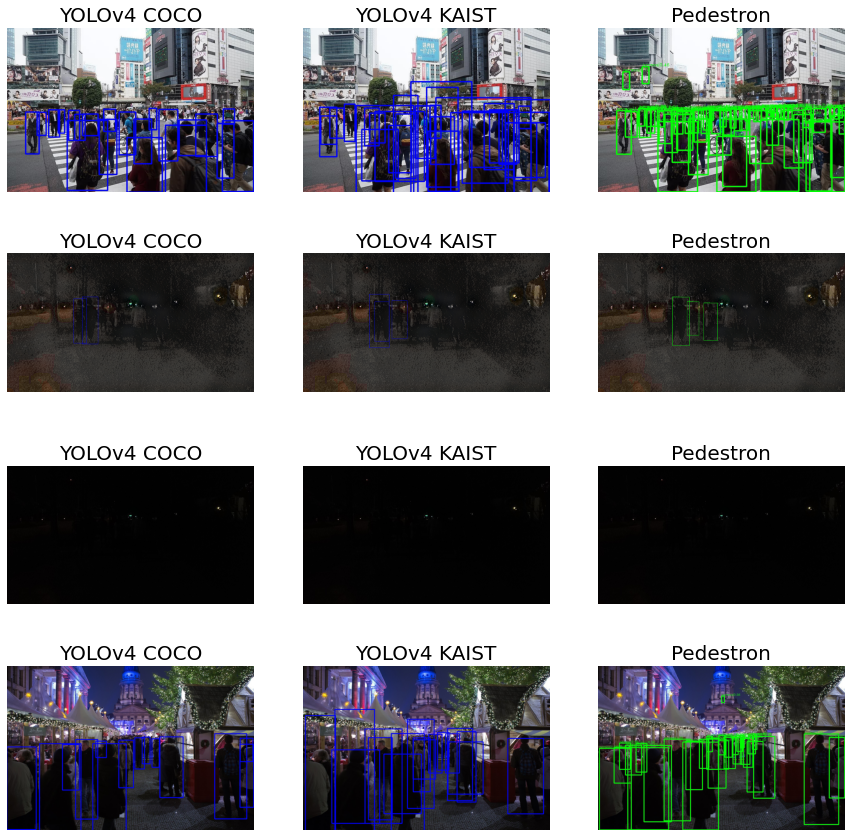

In [ ]:
# show demo detections
show_result_ver2('/content/pedestrian-detection/result_images')

# Run on your images

In [ ]:
%cd /content/
!mkdir your_images
!mkdir your_result_images

/content


In [ ]:
# upload your images - you can uploade many images per time
%cd /content/your_images/

from google.colab import files
uploaded = files.upload()

/content/your_images


MessageError: ignored

In [ ]:
%%capture
# enhancement images
!mkdir /content/enhanced_images/
%cd /content/pedestrian-detection/Zero-DCE/
!python lowlight_test.py -input_dir "/content/your_images/" -output_dir "/content/enhanced_images/"

# move all files to a folder for detection
!mkdir /content/detection_images/
!cp /content/your_images/* /content/detection_images/
!cp /content/enhanced_images/* /content/detection_images/

In [ ]:
%%capture

# Pedestron
%cd /content/pedestrian-detection/Pedestron
!python tools/demo.py configs/elephant/crowdhuman/cascade_hrnet.py ./models_pretrained/CascadeRCNNCP_model.pth.stu /content/detection_images/ /content/your_result_images/

# YOLOv4 COCO
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python models.py weights/yolov4.pth /content/detection_images/ /content/your_result_images/

# YOLOv4 KAIST
%cd /content/pedestrian-detection/pytorch-YOLOv4
!python demo.py -input_dir /content/detection_images/ -output_dir /content/your_result_images/

In [ ]:
show_result_ver2("/content/your_result_images/")

In [ ]:
%%capture
# !rm -rfv /content/your_images/
# !rm -rfv /content/your_result_images/
# !rm -rfv /content/enhanced_images/
# !rm -rfv /content/detection_images